In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('house-prices.csv')
data_te =pd.read_csv('house-prices-test.csv')

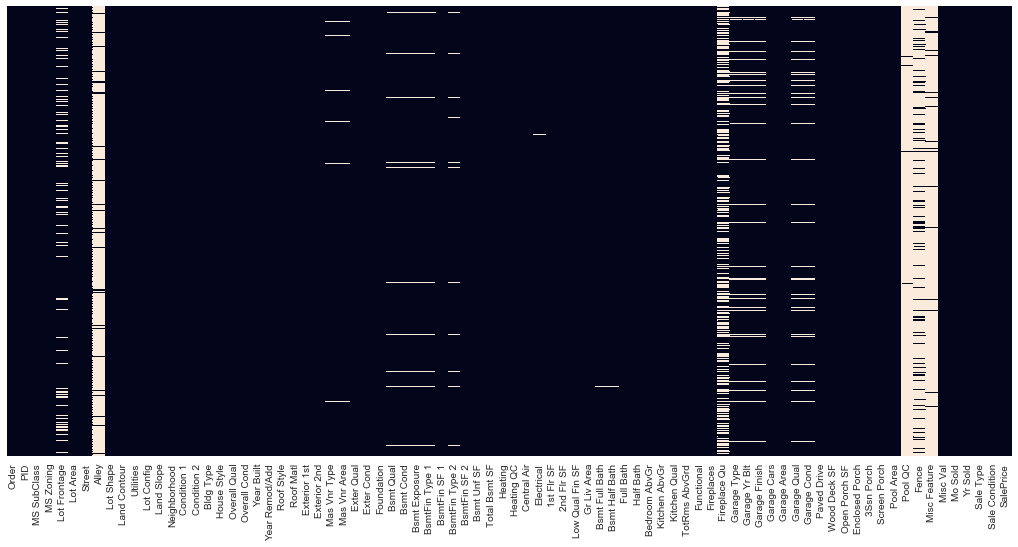

In [3]:
sns.set(rc={'figure.figsize':(18,8.27)})
sns.heatmap(data.isnull(), yticklabels=False, cbar=False)

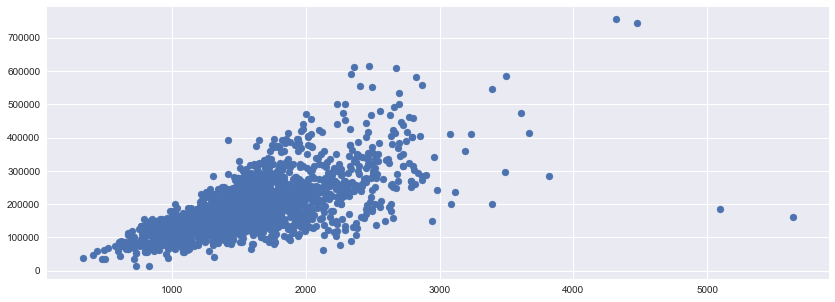

In [4]:
# I remove the outliers that are recomended in the documentation
sns.set()

plt.figure(figsize=(14,5))
plt.scatter(data['Gr Liv Area'],data['SalePrice'])

plt.show()

In [5]:
data = data[data['Gr Liv Area'] < 4000]

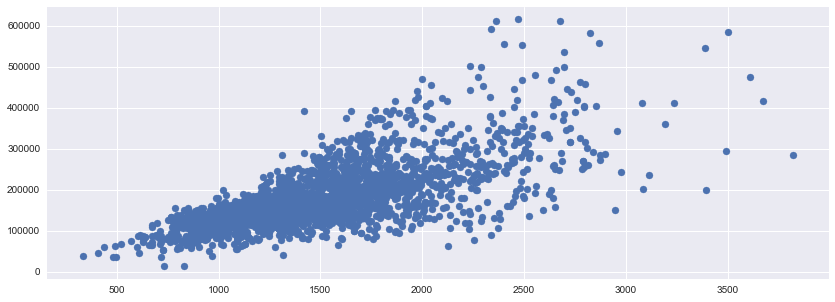

In [7]:
# I remove the outliers that are recomended in the documentation
sns.set()

plt.figure(figsize=(14,5))
plt.scatter(data['Gr Liv Area'],data['SalePrice'])

plt.show()

In [8]:
# I group by neigborhood because I assume that houses in the same neighboorhod will have similar frontages
data['Lot Frontage'] = data.groupby('Neighborhood')['Lot Frontage'].transform(lambda x:
                                                                             x.fillna(x.median()))
data_te['Lot Frontage'] = data_te.groupby('Neighborhood')['Lot Frontage'].transform(lambda x:
                                                                             x.fillna(x.median()))

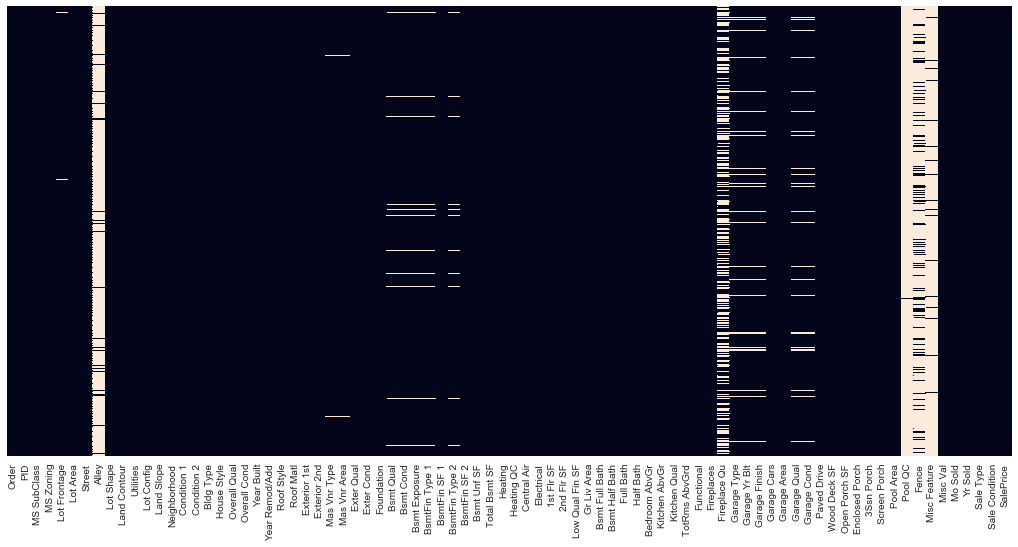

In [9]:
sns.set(rc={'figure.figsize':(18,8.27)})
sns.heatmap(data.isnull(), yticklabels=False, cbar=False)

In [10]:
# I found that there still some NaN values 
#turns out that they are because of whole neighborhoods not having lot frontages
data['Lot Frontage'][data['Lot Frontage'].isnull()]
data['Neighborhood'][data['Neighborhood']=='GrnHill']


35     GrnHill
939    GrnHill
Name: Neighborhood, dtype: object

In [11]:
# I fill them with the general median
data['Lot Frontage'].fillna(data['Lot Frontage'].median(), inplace = True)
data_te['Lot Frontage'].fillna(data_te['Lot Frontage'].median(), inplace = True)

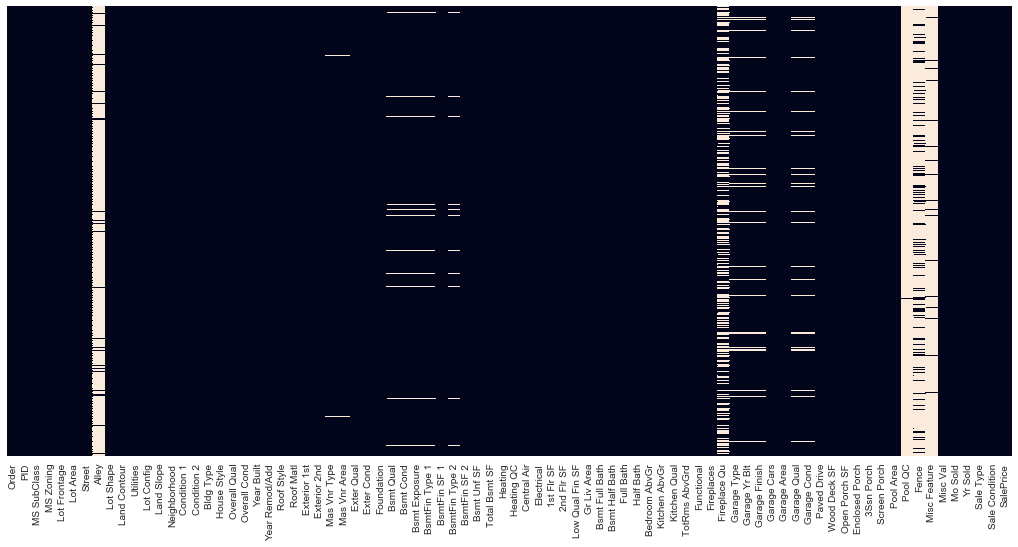

In [12]:
sns.set(rc={'figure.figsize':(18,8.27)})
sns.heatmap(data.isnull(), yticklabels=False, cbar=False)

In [13]:
# I dropped these columns because they are extremely sparse and filling them won't help my model
data.drop(['Alley','Fireplace Qu','Pool QC','Fence','Misc Feature'],inplace =True, axis = 1)
data_te.drop(['Alley','Fireplace Qu','Pool QC','Fence','Misc Feature'],inplace =True, axis = 1)

In [14]:
# I assign the numerical columns before i fill the NaNs to use them later
numerical_cols = data.drop(['SalePrice','PID','Order','MS SubClass'], axis = 1).dtypes[data.drop(['SalePrice','PID','Order','MS SubClass'],axis = 1).dtypes!='object'].index

In [15]:
numerical_cols

Index(['Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond',
       'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1',
       'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt',
       'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF',
       'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val',
       'Mo Sold', 'Yr Sold'],
      dtype='object')

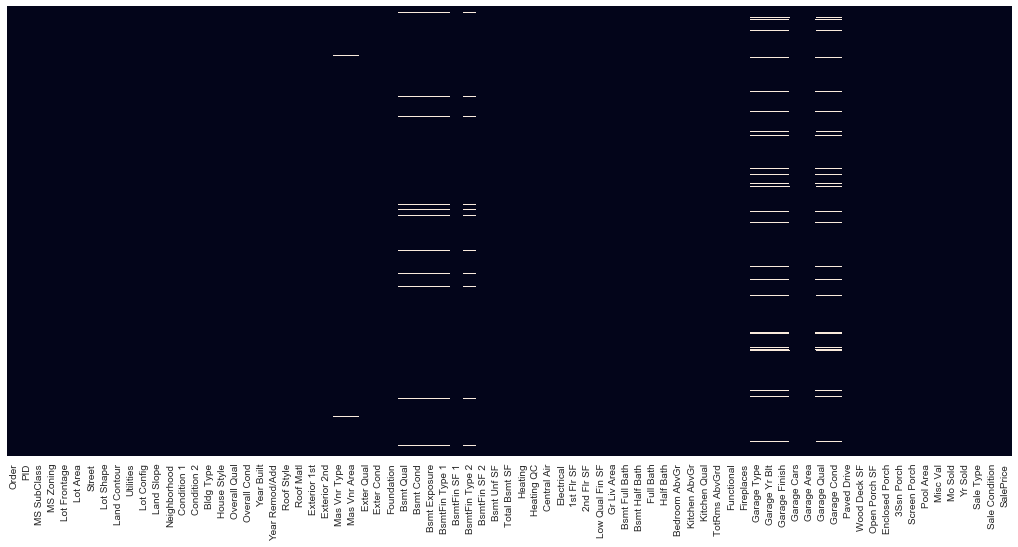

In [16]:
sns.set(rc={'figure.figsize':(18,8.27)})
sns.heatmap(data.isnull(), yticklabels=False, cbar=False)

In [17]:
data.fillna('None',inplace = True)
data_te.fillna('None',inplace = True)

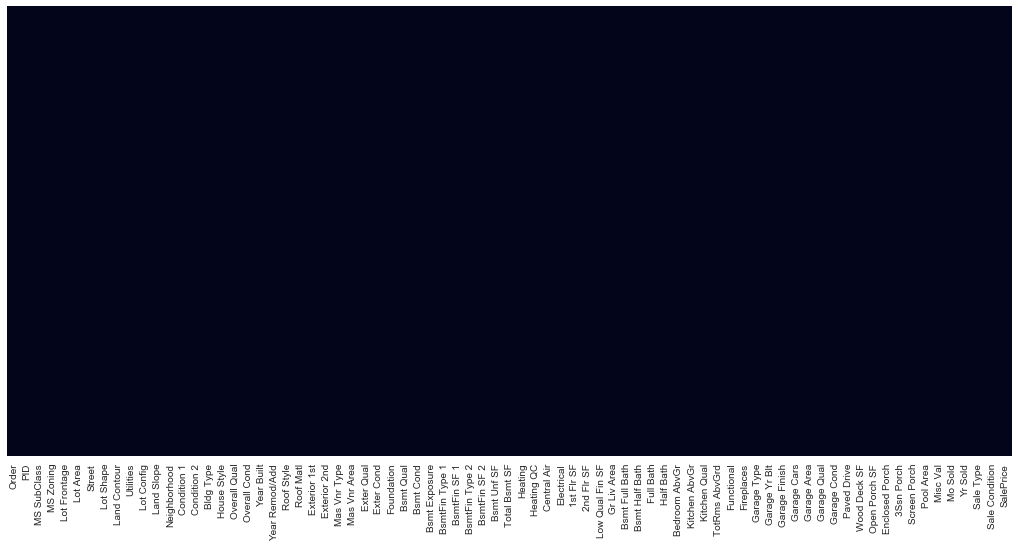

In [18]:
sns.set(rc={'figure.figsize':(18,8.27)})
sns.heatmap(data.isnull(), yticklabels=False, cbar=False)

In [19]:
data['Electrical'].value_counts() , data_te['Electrical'].value_counts()

(SBrkr    2219
 FuseA     160
 FuseF      38
 FuseP       7
 Mix         1
 None        1
 Name: Electrical, dtype: int64, SBrkr    459
 FuseA     28
 FuseF     12
 FuseP      1
 Name: Electrical, dtype: int64)

In [20]:
data['Electrical'].replace(to_replace = 'None', value = data['Electrical'].value_counts().idxmax(),inplace = True)
data_te['Electrical'].replace(to_replace = 'None', value = data_te['Electrical'].value_counts().idxmax(),inplace = True)

In [21]:
# I replace all the str values in ordinal features with increasing numbers
# I am not too concerned with the the scale as long as they are continuous

dict1 = {'IR3':1, 'IR2':2, 'IR1':3, 'Reg':4}

data['Lot Shape'] = data['Lot Shape'].map(dict1)
data_te['Lot Shape'] = data_te['Lot Shape'].map(dict1)

util_dict = {'AllPub': 1 , 'NoSewr': 2, 'NoSeWa': 3, 'ELO': 4}
data['Utilities'] = data['Utilities'].map(util_dict)
data_te['Utilities'] = data_te['Utilities'].map(util_dict)

dict3 = {'Sev':1, 'Mod':2, 'Gtl':3}

data['Land Slope'] = data['Land Slope'].map(dict3)
data_te['Land Slope'] = data_te['Land Slope'].map(dict3)

dict4 = {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5 }

data['Exter Cond'] = data['Exter Cond'].map(dict4)
data_te['Exter Cond'] = data_te['Exter Cond'].map(dict4)
data['Exter Qual'] = data['Exter Qual'].map(dict4)
data_te['Exter Qual'] = data_te['Exter Qual'].map(dict4)
data['Kitchen Qual'] = data['Kitchen Qual'].map(dict4)
data_te['Kitchen Qual'] = data_te['Kitchen Qual'].map(dict4)
data['Heating QC'] = data['Heating QC'].map(dict4)
data_te['Heating QC'] = data_te['Heating QC'].map(dict4)

dict5 = {'None':1, 'No':2, 'Mn':3, 'Av':4, 'Gd':5}

data['Bsmt Exposure'] = data['Bsmt Exposure'].map(dict5)
data_te['Bsmt Exposure'] = data_te['Bsmt Exposure'].map(dict5)

dict6 = {'None':1, 'Po':2, 'Fa':3, 'TA':4, 'Gd':5, 'Ex':6 }

data['Bsmt Qual'] = data['Bsmt Qual'].map(dict6)
data['Bsmt Cond'] = data['Bsmt Cond'].map(dict6)
data['Garage Qual'] = data['Garage Qual'].map(dict6)
data['Garage Cond'] = data['Garage Cond'].map(dict6)

data_te['Bsmt Qual'] = data_te['Bsmt Qual'].map(dict6)
data_te['Bsmt Cond'] = data_te['Bsmt Cond'].map(dict6)
data_te['Garage Qual'] = data_te['Garage Qual'].map(dict6)
data_te['Garage Cond'] = data_te['Garage Cond'].map(dict6)

dict7 = {'None':1, 'Unf':2, 'LwQ':3, 'Rec':4, 'BLQ':5, 'ALQ':6, 'GLQ':7}

data['BsmtFin Type 1'] = data['BsmtFin Type 1'].map(dict7)
data['BsmtFin Type 2'] = data['BsmtFin Type 2'].map(dict7)

data_te['BsmtFin Type 1'] = data_te['BsmtFin Type 1'].map(dict7)
data_te['BsmtFin Type 2'] = data_te['BsmtFin Type 2'].map(dict7)

dict8 = {'None':1, 'Unf':2, 'RFn':3, 'Fin':4}

data['Garage Finish'] = data['Garage Finish'].map(dict8)
data_te['Garage Finish'] = data_te['Garage Finish'].map(dict8)

dict9 = {'Mix':1, 'FuseP':2, 'FuseF':3, 'FuseA':4, 'SBrkr':5}

data['Electrical'] = data['Electrical'].map(dict9)
data_te['Electrical'] = data_te['Electrical'].map(dict9)

dict10 = {'Sal':1, 'Sev':2, 'Maj2':3, 'Maj1':4, 'Mod':5, 'Min2':6, 'Min1':7, 'Typ':8}

data['Functional'] = data['Functional'].map(dict10)
data_te['Functional'] = data_te['Functional'].map(dict10)

dict11 = {'N':1, 'P':2, 'Y':3}

data['Paved Drive'] = data['Paved Drive'].map(dict11)
data_te['Paved Drive'] = data_te['Paved Drive'].map(dict11)

dict12 = {'N':0, 'Y':1}

data['Central Air'] = data['Central Air'].map(dict12)
data_te['Central Air'] = data_te['Central Air'].map(dict12)

In [22]:
# It is a categorical feature with a numeric code, I transform it to str so it does not affect my results


data[['MS SubClass','Mo Sold','Yr Sold']] = data[['MS SubClass','Mo Sold','Yr Sold']].astype(str)
data_te[['MS SubClass','Mo Sold','Yr Sold']] = data_te[['MS SubClass','Mo Sold','Yr Sold']].astype(str)


In [23]:

# then i replace any 'None' values that i previously filled in the NaN with 0 as it is more appropriate

data[numerical_cols] = data[numerical_cols].replace(to_replace = 'None', value = 0)
data_te[numerical_cols] = data_te[numerical_cols].replace(to_replace = 'None', value = 0)


In [24]:
#I make some new columns from combining some features
data['Total_sur'] = (data['Gr Liv Area'] + data['Lot Area'] + data['Total Bsmt SF'])
data_te['Total_sur'] = (data_te['Gr Liv Area'] + data_te['Lot Area'] + data_te['Total Bsmt SF'])
def new(x):
    if x>1999:
        x = 1
    else:
        x = 0
    return x
data['new'] = data['Year Built'].apply(new)
data_te['new'] = data_te['Year Built'].apply(new)

In [25]:
numerical_cols = list(numerical_cols) + ['Total_sur','new']

In [26]:
# i find the 15 most higly correlated features to use in the first 2 models
data.corr().loc[:,'SalePrice'].sort_values(ascending = False).head(16)

SalePrice         1.000000
Overall Qual      0.805112
Gr Liv Area       0.709423
Exter Qual        0.706781
Kitchen Qual      0.674688
Total Bsmt SF     0.664309
1st Flr SF        0.648367
Garage Cars       0.648363
Garage Area       0.639412
Bsmt Qual         0.607464
Year Built        0.567879
Garage Finish     0.553746
Year Remod/Add    0.536960
Full Bath         0.534234
new               0.524774
Mas Vnr Area      0.510476
Name: SalePrice, dtype: float64

In [27]:
# I find all the skewness of the features we have and put them in a list
import math
skews = []
nans = []

for col in numerical_cols:
    skew = data[col].skew()
    if math.isnan(skew):
        nans.append(col)
    else:
        skews.append(skew)
        


In [28]:
# I create a list with the columns that are skewed beyond the threshold of -1,1
# I remove saleprice because I am going to apply a different log to it

skewed_col = []

for names in numerical_cols:
    if np.abs(data[names].skew())>1:
        skewed_col.append(names)
    

In [29]:
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,Total_sur,new
0,484,528275070,60,RL,65.0,8795,Pave,3,Lvl,1,...,0,0,0,4,2009,WD,Normal,236000,12003.0,1
1,2586,535305120,20,RL,75.0,10170,Pave,4,Lvl,1,...,0,0,0,6,2006,WD,Normal,155000,11961.0,0
2,2289,923228250,160,RM,21.0,2001,Pave,4,Lvl,1,...,0,0,0,1,2007,WD,Normal,75000,3639.0,0
3,142,535152150,20,RL,70.0,10552,Pave,3,Lvl,1,...,0,0,0,4,2010,WD,Normal,165500,13650.0,0
4,2042,903475060,190,RM,60.0,10120,Pave,3,Bnk,1,...,0,0,0,1,2007,WD,Normal,122000,12934.0,0


In [30]:
# I apply a log x+1 because i have a lot of 0s
data[skewed_col] = np.log1p(data[skewed_col])
data_te[skewed_col] = np.log1p(data_te[skewed_col])

In [31]:
# I throw out PID and Order because they are not features
data.drop(['PID','Order'], inplace = True, axis = 1)

data_te.drop(['PID','Order'], inplace = True, axis = 1)

# Simple Model

In [32]:
# I will do the train/test split now to have the same split for all the data

from sklearn.model_selection import train_test_split

x = data.drop('SalePrice', axis = 1)
y = data['SalePrice']

x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size=0.5, random_state=0)



In [36]:
# I take the 2 features with the highest correlation to use in my simple model

x_tr_sim = x_tr[['Overall Qual','Gr Liv Area']]
x_te_sim = x_te[['Overall Qual','Gr Liv Area']]

In [41]:
#I will use fit a ridge regression to this dataset
# i will use a grid search for alphas in different polynomial degrees

import warnings
warnings.simplefilter('ignore')
alphas = np.logspace(-20,10, num = 100)
# since i am also searching for the optimal degree i need a dataframe to log both
grid = pd.DataFrame(columns=['rmsle','deg','a','mae'])
i = 0
# I define the metric RMSLE and MAE for later
def rmsle(y,y_pred):
    return np.sqrt(np.mean(np.square(np.log10(y)-np.log10(y_pred))))
# MAE
def mae(y,y_pred):
    return np.mean(np.abs(y-y_pred))


from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures


for num in range(1,8):
    for alpha in alphas:
        poly_obj = PolynomialFeatures(degree = num, include_bias = False)
        x_poly_te = poly_obj.fit_transform(x_te_sim)
        x_poly_tr = poly_obj.fit_transform(x_tr_sim)
        
        ridge = Ridge(alpha = alpha)
        ridge.fit(x_poly_tr,np.log10(y_tr))
        
        #test on test set
        y_pred_ridg_sim = 10 ** ridge.predict(x_poly_te)
        testmse  = rmsle(y_te,y_pred_ridg_sim)
        maet = mae(y_te,y_pred_ridg_sim)
        # log everything in a dataframe
        grid.loc[i] = testmse,num,alpha,maet
        i+=1




In [42]:
# locating the minimum rmsle and finding the best combination
idx = grid['rmsle'].idxmin()
min_rmsle_sim,degree,alpha,mae_sim = grid.loc[idx] 

print('The best RMSLE score on ridge regression was: ',min_rmsle_sim,' With a polynomial degree of: ',
     degree, ' and an alpha of: ', alpha)


The best RMSLE score on ridge regression was:  0.08861188273957003  With a polynomial degree of:  5.0  and an alpha of:  265.6087782946695


# Intermediate Model

In [44]:
# for this model i will take the 10 most correlated numerical columns and 5 categorical columns
# MS Zoning , Lot Config, Neighborhood, Foundation, Bedroom
# I will do the



x_tr_int = x_tr[['TotRms AbvGrd','Overall Qual','Gr Liv Area','Exter Qual', 'Kitchen Qual',
'Total Bsmt SF',    
'1st Flr SF',        
'Garage Cars',       
'Garage Area',       
'Bsmt Qual',        
'Year Built',        
'Year Remod/Add',    
'Full Bath',         
'new',               
'Fireplaces',
'MS Zoning','Lot Config','Neighborhood','Foundation','Bedroom AbvGr']]

x_te_int = x_te[['TotRms AbvGrd','Overall Qual','Gr Liv Area','Exter Qual', 'Kitchen Qual',
'Total Bsmt SF',    
'1st Flr SF',        
'Garage Cars',       
'Garage Area',       
'Bsmt Qual',        
'Year Built',        
'Year Remod/Add',    
'Full Bath',         
'new',               
'Fireplaces',
'MS Zoning','Lot Config','Neighborhood','Foundation','Bedroom AbvGr']]

x_tr_int.reset_index(inplace = True, drop=True)
x_te_int.reset_index(inplace = True, drop =True)


In [45]:
data_te.shape

(500, 76)

In [46]:
#concatenating them so that i get the uniformity in the one-hot encoding
x_onehot = pd.concat([x_tr_int,x_te_int])

one_hoted = pd.get_dummies(x_onehot, columns=['MS Zoning','Lot Config','Neighborhood','Foundation','Bedroom AbvGr'])
one_hoted.head()

# now I seperate the test from the training data according to their indexes
x_tr_int = one_hoted.iloc[:x_tr_int.shape[0]]
x_te_int = one_hoted.iloc[x_tr_int.shape[0]:]



In [48]:
# now I apply again a search for the best combination of degree and alpha for the ridge regression 
grid_inter = pd.DataFrame(columns=['rmsle','deg','a','mae'])
# I only do it until the 2nd degree for memory contraints
i = 0
for num in range(1,3):
    for alpha in alphas:
        poly_obj = PolynomialFeatures(degree = num, include_bias = False)
        x_poly_te = poly_obj.fit_transform(x_te_int)
        x_poly_tr = poly_obj.fit_transform(x_tr_int)
        
        ridge = Ridge(alpha = alpha)
        ridge.fit(x_poly_tr,np.log10(y_tr))
        
        #test on test set
        y_pred_ridg_int = 10 ** ridge.predict(x_poly_te)
        testmse  = rmsle(y_te,y_pred_ridg_int)
        maet = mae(y_te,y_pred_ridg_int)
        # log everything in a dataframe
        grid_inter.loc[i] = testmse,num,alpha,maet
        i+=1



In [50]:
# locating the minimum rmsle and finding the best combination
idx = grid_inter['rmsle'].idxmin()
min_rmsle_int,degree,alpha,mae_int = grid_inter.loc[idx] 

print('The best MSE score on ridge regression was: ',min_rmsle_int,' With a polynomial degree of: ',
     degree, ' and an alpha of: ', alpha)



The best MSE score on ridge regression was:  0.06626841480953437  With a polynomial degree of:  1.0  and an alpha of:  2.009233002565054


# Complex Model

In [52]:
# For this model I take all the remaining features
# Once again i concatenate training and test to do 1-hot
x_te_com = x_te
x_tr_com = x_tr

x_onehot = pd.concat([x_tr_com,x_te_com])

one_hoted = pd.get_dummies(x_onehot, drop_first = True)


# now I seperate the test from the training data according to their indexes
x_tr_com = one_hoted.iloc[:x_tr_com.shape[0]]
x_te_com = one_hoted.iloc[x_tr_com.shape[0]:]


In [53]:

# now I apply again a search for the best combination of degree and alpha for the ridge regression 
grid_com = pd.DataFrame(columns=['rmsle','deg','a','mae'])
# I only do it until the 2nd degree for memory contraints
i = 0
for num in range(1,2):
    for alpha in alphas:
        poly_obj = PolynomialFeatures(degree = num, include_bias = False)
        x_poly_te = poly_obj.fit_transform(x_te_com)
        x_poly_tr = poly_obj.fit_transform(x_tr_com)
        
        ridge = Ridge(alpha = alpha)
        ridge.fit(x_poly_tr,np.log10(y_tr))
        
        #test on test set
        y_pred_ridg_com = 10 ** ridge.predict(x_poly_te)
        testrmsle  = rmsle(y_te,y_pred_ridg_com)
        maet = mae(y_te,y_pred_ridg_com)
        # log everything in a dataframe
        grid_com.loc[i] = testrmsle,num,alpha,maet
        i+=1 

In [55]:
# locating the minimum rmsle and finding the best combination
idx = grid_com['rmsle'].idxmin()
min_rmsle_com,degree,alpha,mae_com = grid_com.loc[idx] 

print('The best MSE score on ridge regression was: ',min_rmsle_com,' With a polynomial degree of: ',
     degree, ' and an alpha of: ', alpha)


The best MSE score on ridge regression was:  0.055053264574538484  With a polynomial degree of:  1.0  and an alpha of:  4.03701725859655


# Model Evaluation

In [56]:
# I use both RMSLE and MAE for model evaluation

#mean for RMSLE
base_rmsle = rmsle(y_te,np.mean(y_tr))
#median for MAE
base_mae = mae(y_te,np.median(y_tr))



In [ ]:
mae(y_te,np.median(y_tr))

([<matplotlib.axis.XTick at 0x11eb499c5f8>,
 <a list of 4 Text xticklabel objects>)

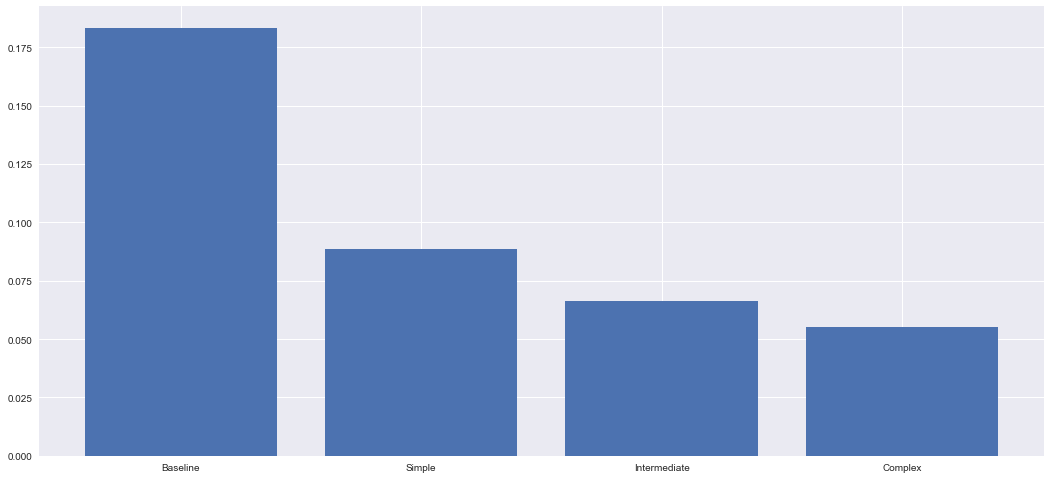

In [57]:
# RMSLE
sns.set()

plt.bar([1,2,3,4],[base_rmsle,min_rmsle_sim,min_rmsle_int,min_rmsle_com])
plt.xticks([1,2,3,4],['Baseline', 'Simple','Intermediate','Complex'])

([<matplotlib.axis.XTick at 0x11eb57b39e8>,
 <a list of 4 Text xticklabel objects>)

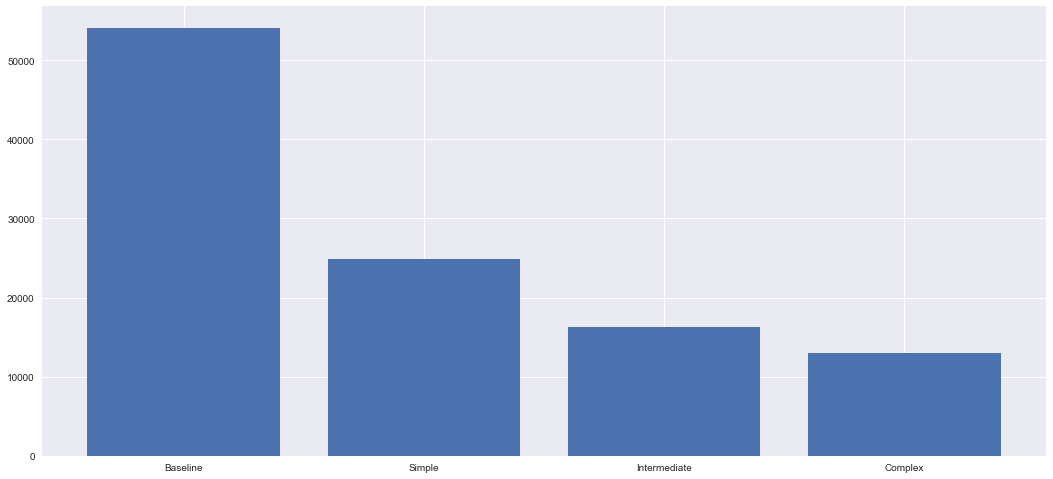

In [58]:
# MAE
sns.set()

plt.bar([1,2,3,4],[base_mae,mae_sim,mae_int,mae_com])
plt.xticks([1,2,3,4],['Baseline', 'Simple','Intermediate','Complex'])

# Final Predictions

In [113]:
# I will use the whole dataset to train the complex model as it is the best performing on
# Then i will make predictions for the testset

y_s = data['SalePrice']
data.drop('SalePrice', axis = 1,inplace = True)
all_data = pd.concat([data,data_te]).reset_index(drop = True)

slic = data.shape[0]

all_data = pd.get_dummies(all_data, drop_first=True)

train = all_data[:slic]
test = all_data[slic:]

train.shape,test.shape

((2426, 227), (500, 227))

In [115]:
poly_obj = PolynomialFeatures(degree = np.int(degree), include_bias = False)
x_poly_tr = poly_obj.fit_transform(train)
ridge = Ridge(alpha = alpha)
ridge.fit(train,np.log10(y_s))

y_pred_final = 10 ** ridge.predict(test)
 

In [117]:
data_te.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,Total_sur,new
0,50,RL,4.204693,9.330432,Pave,3,HLS,1,Corner,2,...,0.0,0.000000,0.0,0.0,3,2007,WD,Normal,9.555418,0.000000
1,20,RL,4.189655,9.185843,Pave,4,Low,1,Inside,2,...,0.0,4.532599,0.0,0.0,10,2009,WD,Normal,9.370587,0.000000
2,60,RL,4.465908,9.311633,Pave,3,Lvl,1,Inside,3,...,0.0,0.000000,0.0,0.0,10,2006,New,Partial,9.555418,0.693147
3,20,RL,4.262680,8.853808,Pave,4,Lvl,1,Inside,3,...,0.0,0.000000,0.0,0.0,4,2007,WD,Family,9.120963,0.000000
4,50,C (all),4.204693,9.072571,Pave,4,HLS,1,Inside,2,...,0.0,0.000000,0.0,0.0,1,2010,WD,Abnorml,9.282661,0.000000


In [118]:
preds = pd.DataFrame()

data_tef =pd.read_csv('house-prices-test.csv')
preds['PID'] = data_tef['PID']
preds['SalePrice'] = y_pred_final

preds.to_csv('house_predictions.csv', index = False)
preds.head()

,PID,SalePrice
0,909279080,191196.695964
1,907126050,152310.309249
2,528144030,281550.019984
3,535452060,128455.401843
4,911202100,85093.609152


In [123]:
preds

,PID,SalePrice
0,909279080,191196.695964
1,907126050,152310.309249
2,528144030,281550.019984
3,535452060,128455.401843
4,911202100,85093.609152
5,531382090,171192.229162
6,902477130,42413.543129
7,527402150,134020.901620
8,908102320,147739.937350
9,908276140,99513.658572


In [119]:
data_trf =pd.read_csv('house-prices.csv')

In [121]:
data_trf.SalePrice.describe()

count      2430.000000
mean     180199.692593
std       79607.467171
min       12789.000000
25%      129000.000000
50%      160000.000000
75%      213099.750000
max      755000.000000
Name: SalePrice, dtype: float64

In [122]:
preds.SalePrice.describe()

count    5.000000e+02
mean     1.849028e+05
std      9.058215e+04
min      4.241354e+04
25%      1.294555e+05
50%      1.588038e+05
75%      2.170668e+05
max      1.050368e+06
Name: SalePrice, dtype: float64